In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from math import log2 
import matplotlib.pyplot as plt

In [7]:
def GraphAnalysisPandas(path:str):
    A = pd.read_csv(path,delimiter='\t', header=None)
    A.rename(columns={0:'T',1: 'P', 2: 'Time'}, inplace=True)
    # pd.options.plotting.backend = "plotly"
    A.plot.scatter(x='T', y='Time')
    A.plot.scatter(x='P', y='Time')



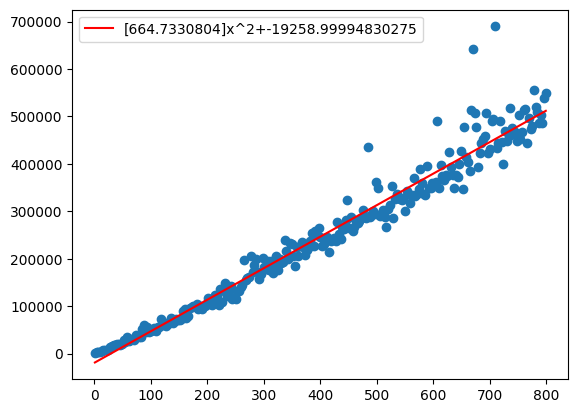

-19258.99994830275 [664.7330804]


In [15]:
model = LinearRegression().fit(a.Lenght.array.reshape(-1,1), a.Time.array)
plt.plot(a.Lenght.array, a.Time.array, 'o', label='')
plt.plot(a.Lenght.array, model.intercept_+model.coef_*a.Lenght.array, 'r', label="{a}x^2+{b}".format(b=model.intercept_,a=model.coef_))
plt.legend()
plt.show()

print(model.intercept_, model.coef_)

In [141]:
def graphAnalysis(path:str, title:str = None, normalize:bool = False, t:int=0):
    title =  title if title != None else path.replace('.txt','').replace('_', ' ')
    A = np.loadtxt(path)
    T = np.array(A[:,0])
    P = np.array(A[:,1])
    y = np.array(A[:,2])
   
    x = None
    model = 0
    xLabel = ''
    yLabel = 'time(ns)'

    if(t == 1):
        x = T
        xLabel = 'T'
    elif(t == 2):
        x = P
        xLabel = 'P'
    else:
        x = T+P
        xLabel = 'T+P'

    if(normalize):
        x = np.array([log2(i) for i in x])
        y = np.array([log2(i) for i in y])

    model = LinearRegression().fit(x.reshape(-1,1), y)

    plt.plot(x,y, 'o', label = xLabel)
    signal = '+' if model.intercept_>=0 else '-'
    
    modelLabel = f"%.2f{'X'} {signal} %.2f" % (model.coef_, model.intercept_ if model.intercept_>0 else model.intercept_*-1)
    plt.plot(x, model.intercept_+model.coef_*x,label= modelLabel)
    plt.legend()
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title, fontweight='bold')
    # plt.show()


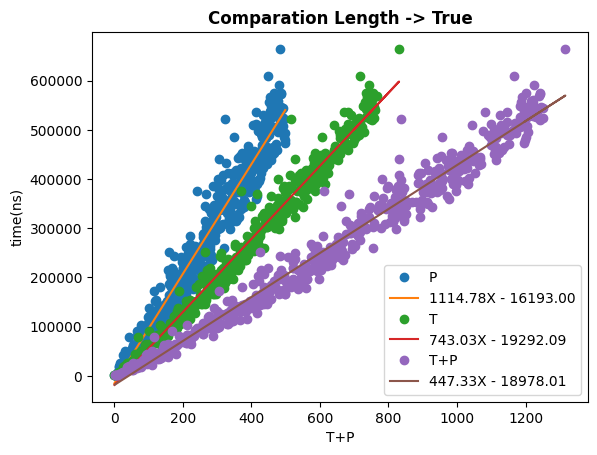

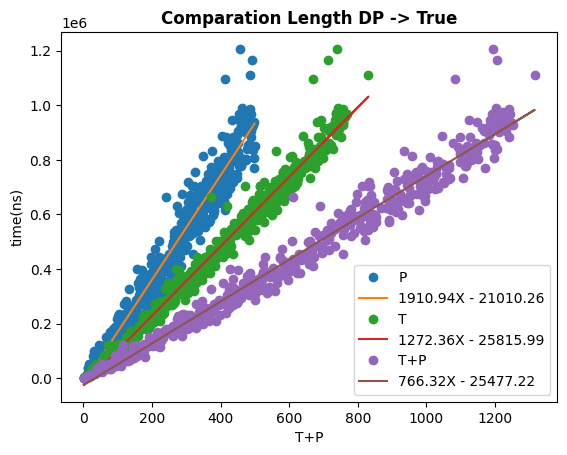

In [146]:
# True comparation
path = 'IsMatch_With_Result_True.txt'
title = 'Comparation Length -> True'
graphAnalysis(path=path, title=title, t=2)
graphAnalysis(path=path, title=title, t=1)
graphAnalysis(path=path, title=title)
plt.show()

# True comparation
path = 'IsMatch_With_Result_True_in_DP.txt'
title = 'Comparation Length DP -> True'
graphAnalysis(path=path, title=title, t=2)
graphAnalysis(path=path, title=title, t=1)
graphAnalysis(path=path, title=title)
plt.show()


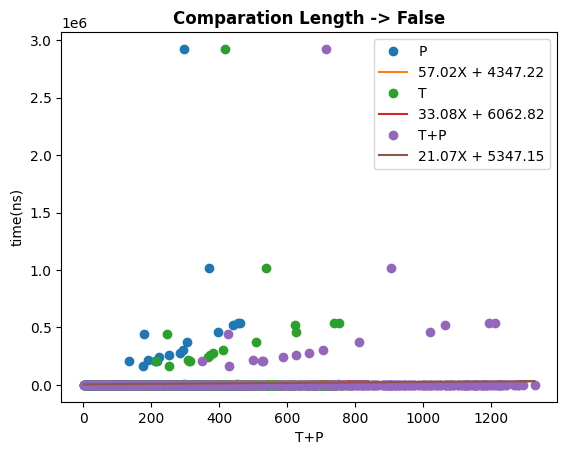

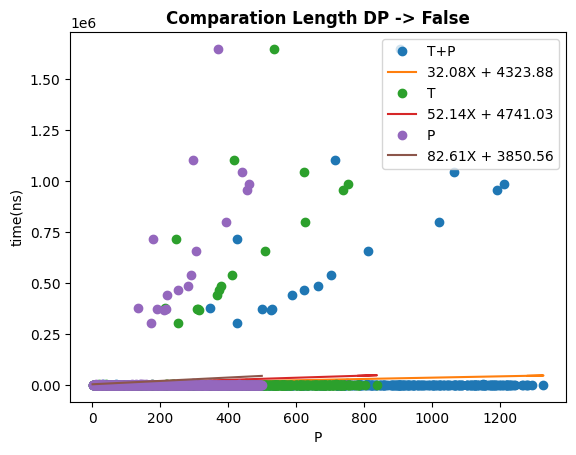

In [148]:
# False comparation
path = 'IsMatch_With_Result_False.txt'
title = 'Comparation Length -> False'
graphAnalysis(path=path, title=title, t=2)
graphAnalysis(path=path, title=title, t=1)
graphAnalysis(path=path, title=title)
plt.show()


# False comparation DP
path = 'IsMatch_With_Result_False_in_DP.txt'
title = 'Comparation Length DP -> False'
graphAnalysis(path=path, title=title)
graphAnalysis(path=path, title=title, t=1)
graphAnalysis(path=path, title=title, t=2)
plt.show()